# DEEPSYNERGY - THEORY - EXPLANATION 

Drug synergy ⇒ 1 + 1 > 2 (for example: the synergy of drug A and drug B each 50%, but together → 90%)

| Type                 | Meaning                                            | Example (both drugs alone have 50% effect)           |
|----------------------|----------------------------------------------------|------------------------------------------------------|
| **Synergistic Effect** | Combined effect is stronger than either alone      | Combined effect reaches **90%**                      |
| **Additive Effect**   | Combined effect is approximately the sum           | Effect ≈ 100% × 50% + 50% = **75%**                  |
| **Antagonistic Effect** | Drugs counteract each other, combined effect weaker | Effect is only **30%**                               |


### Common algorithms and Scoring Criteria:

- Bliss Independence
- Loewe Additivity 
- HSA (Highest Single Agent) 
- ZIP (Zero Interaction Potency)


### Loewe Additivity （important）

- **Loewe Additivity** is a model based on the idea that:

> A drug cannot be synergistic with itself, so combining two drugs with the same or similar mechanism should result in a simple additive effect — no synergy, no antagonism.
> 

If Drug A and Drug B are similar (or affect the same target), then their combined effect should behave like **"more of one drug"**.



| Value | Meaning                                                        |
|-------|----------------------------------------------------------------|
| < 1   | ✅ **Synergy** (needs less drug to achieve effect)             |
| = 1   | ➖ **Additive** (just enough drugs to get the effect)          |
| > 1   | ❌ **Antagonism** (needs more drug than expected)              |


## Gene Expression

### What is Gene Expression?

**Gene expression** is the process by which the information in a gene is used to produce a functional product — usually a **protein**.

In simple terms:

**Gene ON = it is “expressed” → it makes mRNA → mRNA makes proteins**

- If a gene is **highly expressed**, it means the cell is actively using it.
- If a gene is **not expressed**, it’s basically “switched off”.

## What Is Gene Expression Data?

**Gene expression data** is a **numerical representation** of how active each gene is in a particular cell or sample.

You can think of it like a big spreadsheet:

Each number tells you how much of that gene’s mRNA is present in the sample — which correlates with how “on” or active the gene is.

## How Is It Measured?

The two most common methods:

| Method       | Description                         | Notes                        |
|--------------|-------------------------------------|------------------------------|
| **RNA-seq**  | Sequencing all RNA in the cell      | High accuracy, widely used  |
| **Microarrays** | Hybridization with known probes     | Cheaper, less precise        |


After measurement, the data is usually normalized (e.g., TPM, FPKM, log2) to make samples comparable.

### Gene Expression Data as High-Dimensional Features

In machine learning, each gene expression value can be treated as a feature.

- Typically, each sample (e.g., a cancer cell line) contains thousands to tens of thousands of gene expression values

- For example, DeepSynergy uses 3984 gene expression features

Therefore, gene expression data is a high-dimensional vector

### Data Source: CCLE (Cancer Cell Line Encyclopedia)

CCLE is a cancer cell line database developed by MIT and the Broad Institute.
Website: https://portals.broadinstitute.org/ccle

Features:

- Provides data for over 1000 cancer cell lines, including:


- - Gene expression (RNA-seq)

- - Mutations, copy number variations, and epigenetic information

- Widely used in machine learning models, such as:



- - DeepSynergy (predicting drug combinations)

- - DeepCellNet (predicting drug sensitivity)

- - GDSC (predicting single-drug response)

### How is Gene Expression Used in DeepSynergy?

In the DeepSynergy model:

- Each input sample includes: Drug A + Drug B + Cell Line Gene Expression

- The gene expression of a cell line is a vector (e.g., 3984 dimensions)

- The model learns: how drug combination effects vary depending on the cellular context

This reflects the core idea of Precision Medicine!

### Exactly process in Deepsynergy:

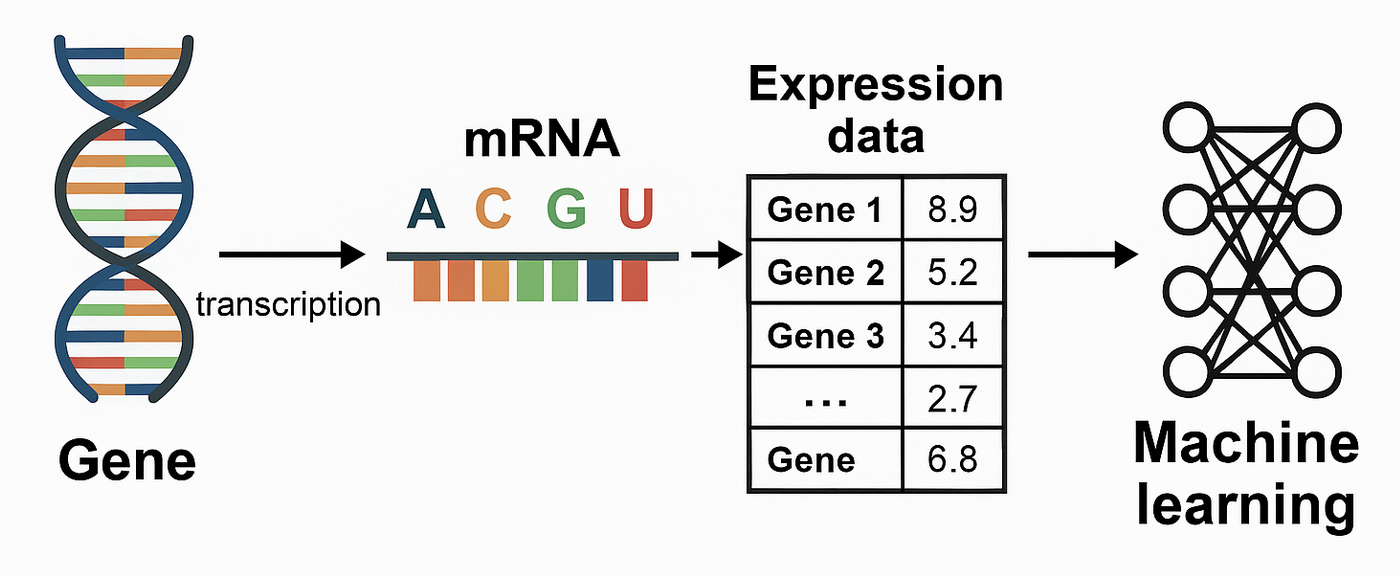

## What Are Molecular Descriptors?

Molecular descriptors refer to:

- Converting the chemical structure (molecular structure) of a drug into a numerical feature vector that can be analyzed and used for modeling.

You can understand it as:
Turning a drug's "structural diagram" or "chemical structure" into a vector, where each number describes some structural property, such as:

- What atoms are present?

- Are there any rings?

- Are there toxic substructures?

### Example:
Extended Connectivity Fingerprint (ECFP)

ECFP4 is a method to "encode molecular structures into numerical vectors."

It examines the "environment" around each atom, generates indices for local substructures, and finally turns them into a vector-like representation for use in neural networks.

Suppose we want the computer to “understand” this structure:


```
    0
    |
C – C – O – H
    |
   CH3
```

But a neural network cannot directly interpret a “picture.” It can only process vectors.

So we need a method to transform this structural image into a string of numbers — and that’s exactly what ECFP (Extended Connectivity Fingerprint) does.

→ How to generate these fingerprints is the next step.

### Imagine: You are an atom, standing at your own doorstep.

Radius = 0: You only see yourself (e.g., you are a carbon atom)

Radius = 1: You look around at your immediate neighbors (you're connected to two hydrogens and one oxygen)

Radius = 2: You look at your neighbors' neighbors (extending to more atoms)


### How Are These Structures Converted into Vectors?

- Each local structure (e.g., C–O–C, N=C–C, etc.) is mapped to a specific bit (e.g., the 512th bit) using a hashing algorithm

- The result is a fixed-length binary vector, such as 1024 or 2048 dimensions

Example (1024 dimensions):

[0, 0, 1, 0, 1, 0, 0, ...] ← structural fingerprint

- Bits with 1 indicate the presence of certain substructures

- Bits with 0 mean the corresponding substructures did not appear

This vector can then be fed into a neural network!



### Process Overview:

- Use SMILES to represent a drug molecule (e.g., Aspirin)

- Use RDKit to parse the molecular structure

- Use ECFP4 to generate local substructure fingerprints (based on atom + neighbors)

- Map each substructure to a position in the vector (via hashing)

- Get a fixed-length binary vector (e.g., 1024 bits)

- The model uses this vector to represent the structural information of the drug

### What is Feature Fusion?

Feature fusion means combining (concatenating) features from multiple sources into one, as the input to a machine learning model.

-> Just like when a doctor diagnoses a patient, they will look at:

Blood pressure + blood sugar + symptoms + CT scan
These pieces of information come from different “dimensions,” but combining them leads to more accurate decisions.

### DeepSynergy needs to predict:

- The synergistic effect of Drug A + Drug B on a specific cancer cell line

So it requires three types of input information:

| Feature Source | Example Description                      | Approx. Feature Dimension |
|----------------|-------------------------------------------|----------------------------|
| **Drug A**     | Molecular fingerprint (e.g., ECFP4)       | ~614                       |
| **Drug B**     | Molecular fingerprint                     | ~614                       |
| **Cell Line**  | Gene expression data (e.g., CCLE profile) | ~3984                      |


### quit IMPORTANT!!!
### Input vector = Drug A features (614) + Drug B features (614) + Cell line features (3984)

Total dimension: ~5212


[0, 1, 0, 0, ..., 614 Drug A features, ..., 614 Drug B features, ..., 3984 Cell Line features]




### Why do we need to do this?

The model must understand three types of information at the same time:

- Different drugs have different structural features

- The same drug pair may behave differently across different cancer cell lines

- Therefore, we need to provide the model with combined information of Drug + Drug + Cell Line

#### Only after fusion can the model learn:

- “Under this cellular background, do these two drugs work synergistically?”

##### What happens after the fusion?

- The fused vector with over 5000 dimensions is fed into the input layer of a neural network

- The network learns complex relationships between these features layer by layer

- Finally, it outputs a synergy score


###### Summary:

| Item                     | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| What is feature fusion   | Combining features from different sources into a unified input vector       |
| Feature fusion in DeepSynergy | Drug A features + Drug B features + Cell Line features → concatenated as input |
| Total input dimension    | Approximately 5212 dimensions                                               |
| Benefit of fusion        | Enables the model to consider multiple factors, improving prediction        |



## Cross-validation Methods:

### What is cross-validation?

**Cross-validation** is a method that:

> “Repeatedly splits the data into training and test sets” to evaluate whether a model performs stably and reliably on new data.
> 

### **Example:**

Imagine you're preparing for a test with 100 practice questions. To check whether you’ve really learned the material, you:

- Randomly choose 80 questions to practice (**training set**)
- Use the remaining 20 questions to test yourself (**test set**)

If you only test once, you might score high just by luck.

But if you test yourself with **different sets of questions**, such as:

| Test Round   | Training Questions           | Test Questions     |
|--------------|------------------------------|--------------------|
| First Test   | Questions 1–80               | Questions 81–100   |
| Second Test  | Questions 21–100             | Questions 1–20     |
| Third Test   | Questions 41–100 + 1–20      | Questions 21–40    |


Then you can **more objectively evaluate:**

- “Have I truly mastered the material?” — not just memorized one batch of questions.


### Standard K-Fold Cross-Validation (Most Common)

**Idea:**

Divide the entire dataset into K equal parts (commonly 5 or 10), for example:

In each round, the model is evaluated on a different test set.
At the end, the average score across all rounds is computed as the final performance of the model.


| Round   | Training Set         | Test Set |
|---------|----------------------|----------|
| Round 1 | Folds 2–5            | Fold 1   |
| Round 2 | Folds 1, 3, 4, 5     | Fold 2   |
| ...     | ...                  | ...      |
| Round 5 | Folds 1–4            | Fold 5   |



**✅ Advantages:**

- Maximizes the use of available data

- Suitable for general-purpose machine learning tasks

- Benefits: Fair, comprehensive, and saves data resources

**Drawback:**

Your dataset contains the following combinations:

| Drug Combination | Cell Line     | Synergy Score |
|------------------|---------------|----------------|
| A + B            | Lung cancer   | 30             |
| A + C            | Liver cancer  | 50             |
| B + C            | Lung cancer   | 70             |

If you only perform random splitting (k-fold), it’s possible that:

- Both the training set and test set will contain A, B, C, and the lung cancer cell line

- The model ends up memorizing specific combinations, rather than learning generalizable patterns


### More Complex Cross-Validation in DeepSynergy

DeepSynergy is not a typical task — it needs to predict **how drug combinations behave under different cellular environments.**

Therefore, it uses more **realistic and stricter cross-validation methods:**

| Validation Method        | Why DeepSynergy Needs It                                                |
|--------------------------|--------------------------------------------------------------------------|
| Standard k-fold          | ❌ Too loose; model may just “memorize” the training data               |
| Leave-combination-out    | ✅ Checks if the model can predict unseen **drug combinations**         |
| Leave-drug-out           | ✅ Checks if the model works on **new drugs**                           |
| Leave-cell-line-out      | ✅ Checks if the model generalizes to **new patients / cancer types**   |


DeepSynergy uses these stricter validation strategies to ensure that the model truly learns to:

### Generalize to unseen real-world scenarios

Generalization means the model performs well **not just on training data,** but also on **new, unseen data:**

- If a student practices 100 questions and always gets them right — but then gets new questions wrong
    → They’ve only memorized training questions and lack generalization.

- If a student performs well even on new, unseen questions
    → That’s a sign of strong generalization ability.

During training, the model will see many **sample patterns** (like drug combos or cell lines).
What we hope is not that it memorizes them, but instead:

- Learns the **underlying biological rules,**
    so that it can make accurate predictions even on new drugs, new cells, or new combinations.
    
| Scenario                  | Terminology                          |
|---------------------------|---------------------------------------|
| Good training, poor test  | Overfitting (过拟合)                 |
| Good test performance     | Good generalization (泛化能力强)     |


### Leave-drug-combination-out
🧠 Idea:

- The drug combinations in the test set (e.g., A + B) never appeared in the training set.

In other words:

The model has never seen the effect of these two drugs used together.

📌 This simulates real-world scenarios where:

You want the model to predict the effect of entirely new drug combinations.

- Combinations like A + B appear only in the test set, not in the training set

- ➤ Used to check if the model can predict unseen combinations

### Leave-cell-line-out

🧠 Idea:

- Cell lines in the test set (e.g., lung cancer cells) are completely absent from the training set.

In other words:

The model must generalize to a brand new cancer background.

📌 This simulates real-world scenarios where:

You want to predict the effectiveness of drug combinations in new patients or new cancer types.

- Certain cell lines (e.g., one patient’s cells) appear only in the test set

- ➤ Used to evaluate whether the model can generalize to unseen patients or cancer types

### Leave-drug-out

Leave-drug-out means:

A specific drug (A or B) in the test set has never appeared in the training set.

This simulates the situation where:

You’ve discovered a new drug that hasn’t been tested yet, and you want the model to predict:

“If I combine this new drug with a known drug, will it produce synergy in a certain cell?”

- A drug (e.g., B) appears only in the test set, not in the training set

- ➤ Used to simulate new drug development or exploration of unknown drugs

**Therefore:**

- The model must learn the deep relationship between drug structure and synergy,

- rather than relying on memorizing previously seen drug combinations or drugs themselves.

#### Example:

Suppose you have 5 drugs: A, B, C, D, E

You apply the Leave-drug-out method by completely excluding drug E from the training set:

- Training set: All combinations not containing E, such as A + B, B + C, A + D

- Test set: All combinations containing E, such as A + E, C + E, E + D



### Common Cross-Validation Methods

***(You should focus on understanding these three types)***

| Validation Method        | What "New Situation" Appears in the Test Set? | What Does It Mean?                                              |
|--------------------------|-----------------------------------------------|------------------------------------------------------------------|
| ✅ k-fold CV             | Random splits, data evenly distributed         | Tests whether the model works on general/unseen data            |
| ✅ Leave-drug-combo-out  | A new drug combination (e.g., A + B)           | Tests if the model can predict **unseen drug combinations**     |
| ✅ Leave-drug-out        | A new drug (e.g., drug B)                      | Tests if the model can handle **an entirely new drug**          |
| ✅ Leave-cell-line-out   | A new cell line (e.g., a new patient)  




| Name                  | What Real-World Scenario Does It Simulate?                              |
|------------------------|-------------------------------------------------------------------------|
| Leave-drug-combo-out  | I’ve tested drug A and B, but **never seen them together**              |
| Leave-drug-out        | I’ve **never seen drug B before** — this is a new drug                  |
| Leave-cell-line-out   | A **new patient** shows up — I’ve never seen this cell line before      |


Cross-validation is like taking the test multiple times with **different versions of the questions.**
Different strategies represent testing the model from **different angles,**
with the goal of evaluating how reliably it performs on:

**new combinations, new drugs, and new cell lines.**

### Pearson Correlation Coefficient

***What is it?***

It measures the linear correlation between two variables, with a range from -1 to +1:

- **+1** → perfect positive correlation  
- **0**  → no linear correlation  
- **-1** → perfect negative correlation

#### What does it mean in DeepSynergy?

In DeepSynergy, Pearson measures:

Pearson = Linear agreement between predicted values ↔ actual synergy scores


---

##### 📊 Interpretation Table:

| Pearson Value | Meaning                                         |
|---------------|--------------------------------------------------|
| ≥ 0.9         | Very strong correlation — predictions are highly reliable |
| 0.7 – 0.9     | Good correlation — with some fluctuations         |
| < 0.5         | Weak correlation — model may not have learned real patterns |


### ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

#### What is it?

If we convert our model task into a binary classification problem:

- Synergy score ≥ threshold → **synergistic** (positive)
- Synergy score < threshold → **not synergistic** (negative)

Then we can draw an ROC curve:

- **x-axis**: False Positive Rate
- **y-axis**: True Positive Rate

**ROC-AUC** is the area under the ROC curve. It ranges from **0.5 to 1.0**.

---

#### How can we interpret AUC?

- **AUC = 0.5** → The model is completely guessing (no learning)
- **AUC = 1.0** → The model perfectly classifies all samples
- **AUC ≥ 0.9** → The model separates positive/negative very well

---

#### Example:

| Drug Combo | True Synergy? | Predicted Score |
|------------|----------------|------------------|
| A + B      | Yes            | 95               |
| A + C      | No             | 20               |
| B + D      | Yes            | 87               |
| C + D      | No             | 10               |

➡️ In this case, the **ROC-AUC is high**, because the model assigns higher scores to synergistic pairs and lower scores to non-synergistic ones.


## Why AUC ≈ 0.9 Indicates an Excellent Model

### AUC Value Interpretation

| AUC Value | Interpretation |
|-----------|----------------|
| ≥ 0.9     | The model can almost perfectly separate synergistic and non-synergistic combinations |
| 0.7 – 0.9 | The model has strong discriminative power |
| 0.5 – 0.7 | The model performs average, slightly better than guessing |
| ≤ 0.5     | The model is making reverse predictions (worse than random guessing) |

---

### In drug combination prediction tasks, AUC > 0.85 is already very valuable, because:

- The real data is very noisy
- Synergistic combinations are rare and complex
- So achieving AUC ≈ 0.9 means the model has truly learned **the rules for effective combinations**

---

### Comparison of Evaluation Metrics

| Metric               | Task Type | Meaning                                                      | What does ≥ 0.9 mean?                      |
|----------------------|-----------|---------------------------------------------------------------|--------------------------------------------|
| Pearson Correlation  | Regression | Measures how well predicted synergy matches true values       | The model predicts values very accurately   |
| ROC-AUC              | Classification | Measures whether model can classify synergy (yes/no)       | The model can accurately separate synergy vs non-synergy |
